In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bioinfokit.visuz import cluster
import matplotlib_venn

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
path = 'data_final_clean_3s_221019.csv'
    
data = pd.read_csv(path)
data = pd.DataFrame(data = data)
print(data.shape)
data.head()

(65191, 51)


,Unnamed: 0,Unnamed: 0.1,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,Cage_VDM_update,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,value_wt
0,0,0,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,2,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:51,drink_1,0.021,2022-10-10 16:17:51,1.665419e+09,2022-10-10,10,16:17:51,16,17,51,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58671,16,977,58611,EtOH05,0.707071
1,1,1,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,3,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:54,drink_1,0.021,2022-10-10 16:17:54,1.665419e+09,2022-10-10,10,16:17:54,16,17,54,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58674,16,977,58614,EtOH05,0.707071
2,2,2,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,4,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:57,drink_1,0.021,2022-10-10 16:17:57,1.665419e+09,2022-10-10,10,16:17:57,16,17,57,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58677,16,977,58617,EtOH05,0.707071
3,3,3,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,5,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 16:17:59,drink_1,0.021,2022-10-10 16:17:59,1.665419e+09,2022-10-10,10,16:17:59,16,17,59,light,VDM_EtOH05,1.0,22.395,041AC165FE,etoh_05,2022-10-10 16:17:46.580035200,2022-10-10 16:18:08.975035200,light,1,0.0,same,1,977,58679,16,977,58619,EtOH05,0.707071
4,4,4,poly,six_four,22.10.10,na,1,041AC165FE,2137.0,NaN,na,male,4,29.7,NaN,NaN,NaN,15,w_e10_f20_w_e5_f5_mf_221010.csv,2,10/10/22 17:28:38,drink_1,0.021,2022-10-10 17:28:38,1.665423e+09,2022-10-10,10,17:28:38,17,28,38,light,VDM_EtOH05,1.0,19.446,041AC165FE,etoh_05,2022-10-10 17:28:30.700963200,2022-10-10 17:28:50.146963200,light,1,0.0,same,1,1048,62918,17,1048,62858,EtOH05,0.707071


In [3]:
data.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'Round', 'Build', 'Startdate',
       'Timepoint', 'Cage', 'IdRFID', 'Animal', 'ARF_Cage', 'Injury',
       'Sex', 'Cage_N', 'weight_pre', 'weight_post', 'weight_diff',
       'notes', 'index', 'VDM_file', 'Cage_VDM', 'VDM_Time', 'variable',
       'value', 'VDM_datetime', 'VDM_timestamp', 'VDM_date', 'VDM_day',
       'VDM_time', 'VDM_hour', 'VDM_min', 'VDM_second', 'ld_seg',
       'VDM_drink', 'Cage_VDM_update', 'RFID_eventDuration',
       'RFID_assign_id_pre', 'RFID_assign_var_pre',
       'RFID_datetime_start_pre', 'RFID_datetime_end_pre', 'ld_cycle',
       'ld_day', 'VDM_RFID_timediff', 'VDM_RFID_timediff_bool',
       'day_count', 'min_count', 'sec_count', 'hour_count_running',
       'min_count_running', 'sec_count_running', 'substance', 'value_wt'],
      dtype=object)

In [4]:
#@title day
df_day = data.sort_values(by=['IdRFID','day_count']).reset_index()
params = ['Sex', 'Cage_N', 'IdRFID', 'day_count', 'substance', 'value_wt', 'ld_cycle']
df_day=df_day[params]
flavors=df_day.pivot(columns='substance',values='value_wt')
flavors= flavors.fillna(0)
df_day = df_day[['Sex', 'Cage_N', 'IdRFID', 'day_count','ld_cycle' ]].join(flavors)
df_day.head()

,Sex,Cage_N,IdRFID,day_count,ld_cycle,EtOH05,EtOH10,Fent05,Fent20,water
0,male,3,041ABFE4E6,1,dark,0.0,0.0,0.0,0.0,0.83045
1,male,3,041ABFE4E6,1,dark,0.0,0.0,0.0,0.0,0.83045
2,male,3,041ABFE4E6,1,dark,0.0,0.0,0.0,0.0,0.83045
3,male,3,041ABFE4E6,1,dark,0.0,0.0,0.0,0.0,0.83045
4,male,3,041ABFE4E6,1,dark,0.0,0.0,0.0,0.0,0.83045


In [6]:
df_day = df_day.replace(to_replace=['female','male','dark','light'],value=[0,1,0,1])

block_df = df_day.groupby(['Sex', 'Cage_N', 'IdRFID', 'day_count','ld_cycle'])['EtOH05', 'EtOH10', 'Fent05', 'Fent20', 'water'].sum().reset_index()

block_df.head()

,Sex,Cage_N,IdRFID,day_count,ld_cycle,EtOH05,EtOH10,Fent05,Fent20,water
0,0,1,041AC03290,1,0,0.0,0.000000,0.000000,4.046512,37.488372
1,0,1,041AC03290,1,1,0.0,0.000000,0.000000,1.348837,0.000000
2,0,1,041AC03290,2,0,0.0,1.069767,16.744186,2.697674,66.325581
3,0,1,041AC03290,2,1,0.0,0.000000,2.232558,0.000000,25.953488
4,0,1,041AC03290,3,0,0.0,0.000000,23.441860,0.000000,80.744186


In [7]:
feat_df = block_df[['EtOH05', 'EtOH10', 'Fent05', 'Fent20', 'water']]
df_st =  StandardScaler().fit_transform(feat_df)  

pca_out = PCA().fit(df_st)

pca_out.explained_variance_ratio_

np.cumsum(pca_out.explained_variance_ratio_)

array([0.25922425, 0.51716404, 0.71479553, 0.86554044, 1.        ])

In [8]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['substance'] = feat_df.columns.values
loadings_df = loadings_df.set_index('substance')
loadings_df

,PC1,PC2,PC3,PC4,PC5
substance,,,,,
EtOH05,0.098215,0.670493,-0.043145,0.731221,0.065175
EtOH10,0.136824,0.234771,0.940141,-0.186001,0.087756
Fent05,-0.712900,-0.102172,0.093015,0.134839,0.674167
Fent20,-0.010597,0.653382,-0.312229,-0.639179,0.258735
water,0.680657,-0.240781,-0.090199,0.063154,0.683086


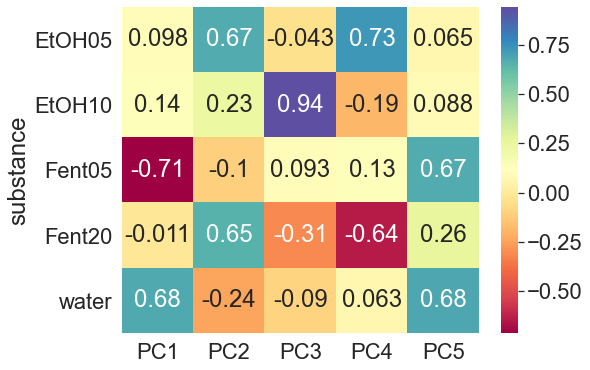

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

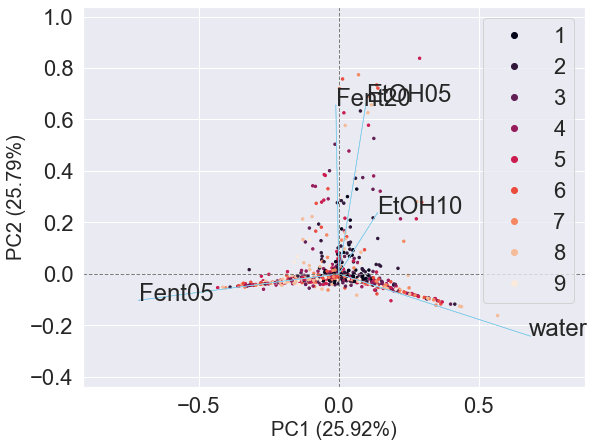

In [13]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=feat_df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), show=True, dim=(9,7), axlabelfontsize=20,
              colorlist=block_df['day_count'])

plt.show()

In [11]:
componentsDf = pd.DataFrame(data = pca_scores[:, 0:2], columns = ['PC1', 'PC2'])
pcaDf = pd.concat([block_df, componentsDf], axis=1)
pcaDf.head()

,Sex,Cage_N,IdRFID,day_count,ld_cycle,EtOH05,EtOH10,Fent05,Fent20,water,PC1,PC2
0,0,1,041AC03290,1,0,0.0,0.000000,0.000000,4.046512,37.488372,0.701684,-0.134483
1,0,1,041AC03290,1,1,0.0,0.000000,0.000000,1.348837,0.000000,-0.012016,-0.029559
2,0,1,041AC03290,2,0,0.0,1.069767,16.744186,2.697674,66.325581,0.994056,-0.377427
3,0,1,041AC03290,2,1,0.0,0.000000,2.232558,0.000000,25.953488,0.444959,-0.284867
4,0,1,041AC03290,3,0,0.0,0.000000,23.441860,0.000000,80.744186,1.111628,-0.709560


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

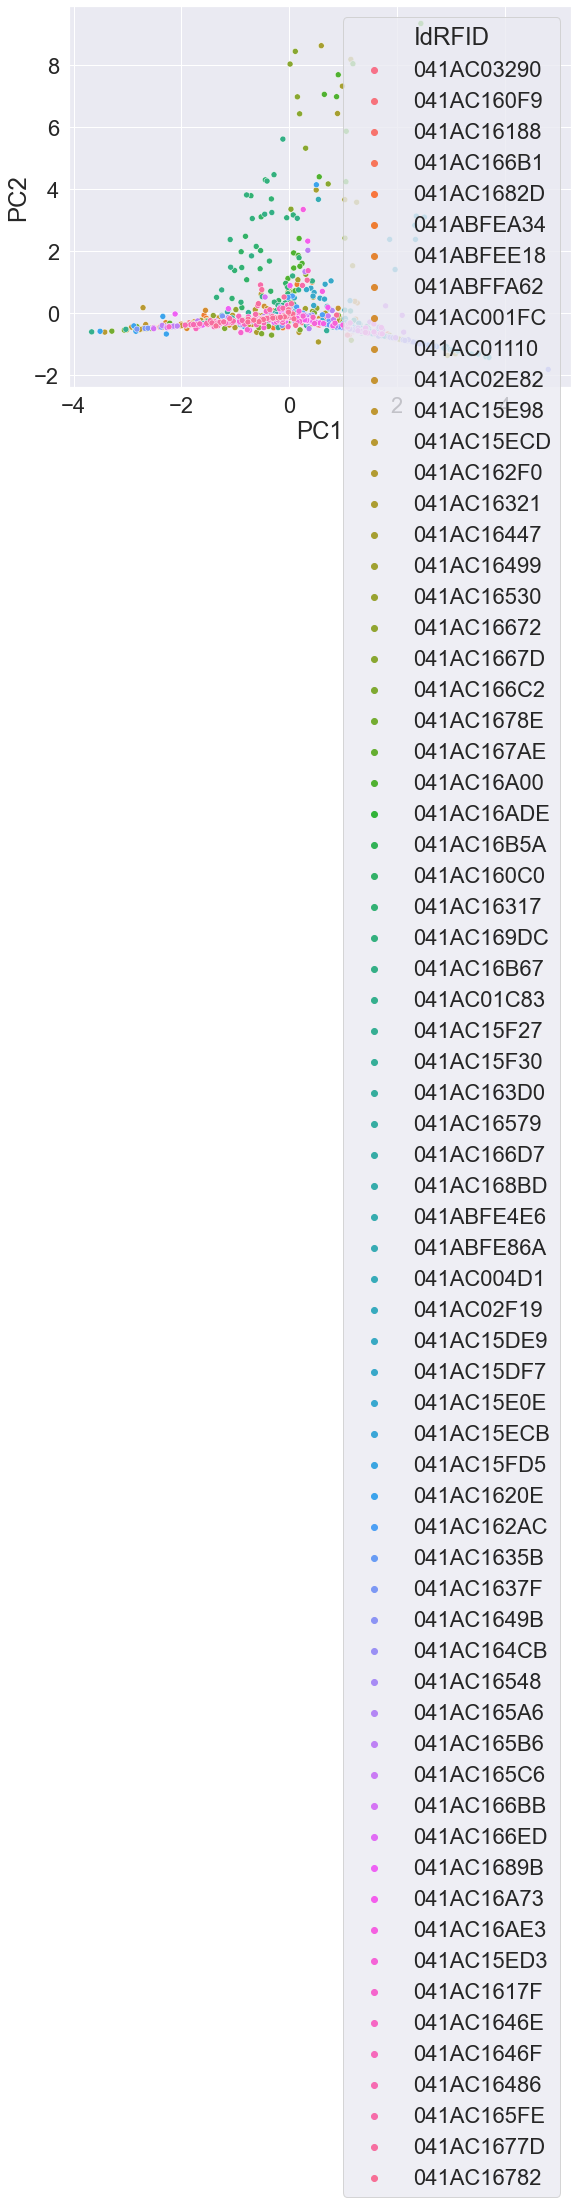

In [12]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="IdRFID")